In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import table
from pathlib import Path

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Experiment

In [10]:
ID = ["ID"]
USER = ["SubjectID"]
IDS = ["SubjectID", "VideoID"]
TARGET = ["predefinedlabel"]
FEATURES = ["Delta", "Theta", "Alpha1", "Alpha2", "Beta1", "Beta2", "Gamma1", "Gamma2"]

In [11]:
data_dir = Path("/home/aseliverstov/projects/brain_signals/data")
data = pd.read_csv(data_dir / "EEG_data.csv")

data["ID"] = (len(np.unique(data["VideoID"])) * data["SubjectID"] + data["VideoID"]).astype("int")
data = data[ID + USER + FEATURES + TARGET]

data.head(3)

,ID,SubjectID,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel
0,0,0.000,301963.000,90612.000,33735.000,23991.000,27946.000,45097.000,33228.000,8293.000,0.000
1,0,0.000,73787.000,28083.000,1439.000,2240.000,2746.000,3687.000,5293.000,2740.000,0.000
2,0,0.000,758353.000,383745.000,201999.000,62107.000,36293.000,130536.000,57243.000,25354.000,0.000


In [32]:
np.round(data[FEATURES].describe()).astype("int")

,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
count,12811,12811,12811,12811,12811,12811,12811,12811
mean,605785,168053,41384,33183,24318,38144,29593,14416
std,637624,244135,72431,58314,38380,79066,79826,36035
min,448,17,2,2,3,2,1,2
25%,98064,26918,6838,6852,6140,7358,4058,2168
50%,395487,81331,17500,14959,12818,15810,9763,5116
75%,916623,205276,44780,34550,27406,35494,24888,12670
max,3964663,3007802,1369955,1016913,1067778,1645369,1972506,1348117


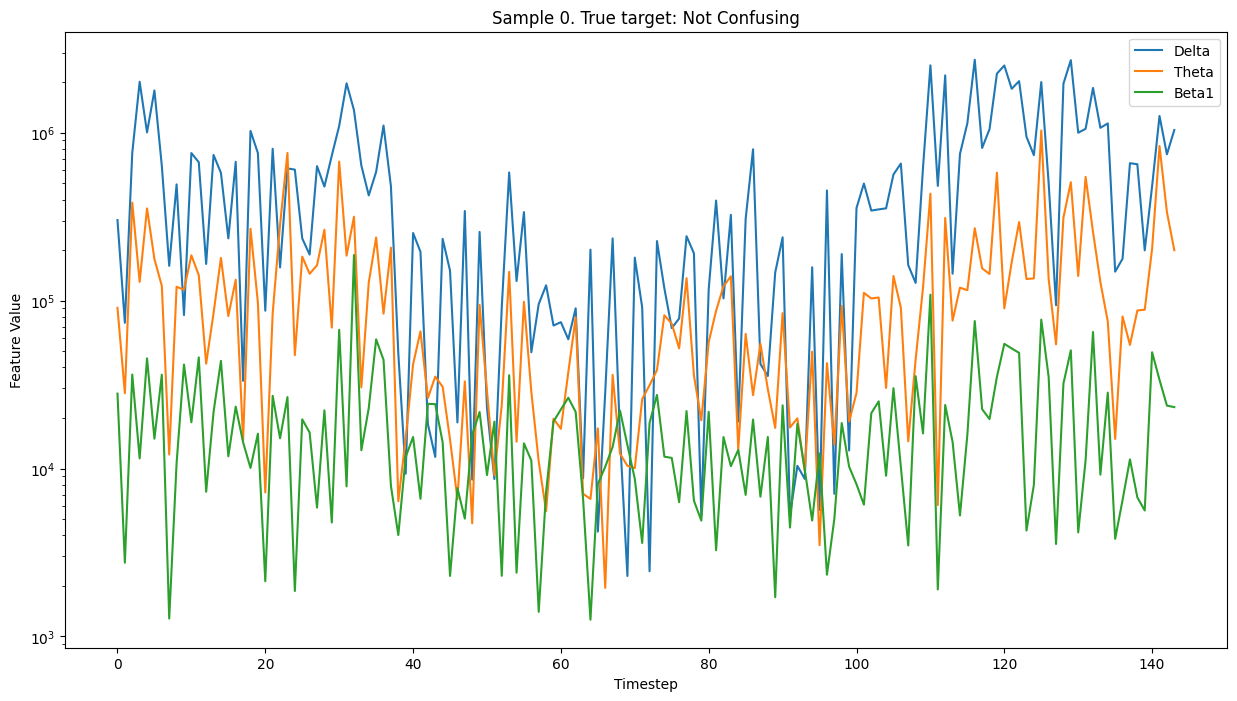

In [52]:
k = 0
signals = ["Delta", "Theta", "Beta1"]

plt.figure(figsize=(15, 8))

cur_df = data[data["ID"] == k]

ts = np.arange(cur_df.shape[0])
for i, feature_name in enumerate(signals):
    plt.plot(ts, cur_df[signals].iloc[:, i], label=feature_name)
    
plt.yscale('log')
plt.xlabel("Timestep")
plt.ylabel("Feature Value")

plt.legend(loc="upper right")
plt.title(f"Sample {k}. True target: {'Confusing' if cur_df[TARGET].iloc[0, 0].astype('int') else 'Not Confusing'}")
plt.show()

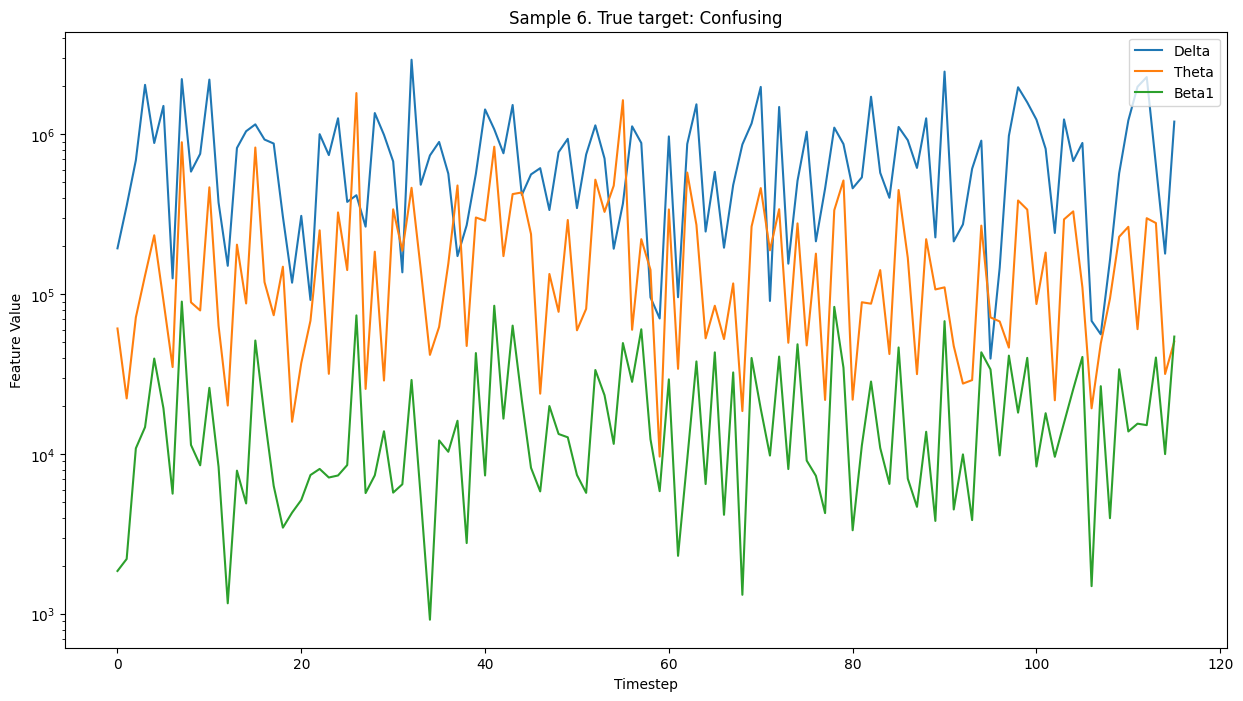

In [54]:
k = 6
signals = ["Delta", "Theta", "Beta1"]

plt.figure(figsize=(15, 8))

cur_df = data[data["ID"] == k]

ts = np.arange(cur_df.shape[0])
for i, feature_name in enumerate(signals):
    plt.plot(ts, cur_df[signals].iloc[:, i], label=feature_name)
    
plt.yscale('log')
plt.xlabel("Timestep")
plt.ylabel("Feature Value")

plt.legend(loc="upper right")
plt.title(f"Sample {k}. True target: {'Confusing' if cur_df[TARGET].iloc[0, 0].astype('int') else 'Not Confusing'}")
plt.show()